# Results Analyser

## Library Imports

In [3]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

## Helper functions definition

In [4]:
def size_fixer(df_dict, n_epochs):
    for key in df_dict.keys():
        df_dict[key] = df_dict[key].iloc[:n_epochs,:]
    
    return df_dict

def collect_experiment_dicts(target_dir, test_flag=False):
    experiment_dicts = dict()
    for subdir, dir, files in os.walk(target_dir):
        for file in files:
            filepath = None
            if not test_flag:
                if file == 'summary.csv':
                    filepath = os.path.join(subdir, file)
            
            elif test_flag:
                if file == 'test_summary.csv':
                    filepath = os.path.join(subdir, file)
            
            if filepath is not None:
                
                with open(filepath, 'r') as read_file:
                    lines = read_file.readlines()
                
                pd_file = pd.read_csv(filepath)
                    
                current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
                idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}
                
                for line in lines[1:]:
                    for idx, value in enumerate(line.replace('\n', '').split(',')):
                        current_experiment_dict[idx_to_key[idx]].append(float(value))
                
                experiment_dicts[subdir.split('/')[-2]] = pd_file
    
    print("Data files:", list(experiment_dicts.keys()))
                
    return experiment_dicts

## Experiment Set 1 -  Testing if problem is solved + Sigmoid function 

In [108]:
# Collect Results DataFrames
experiment_dir = '../Remote_Experiments/Experiment_Set_1/'
df_result_dict = size_fixer(collect_experiment_dicts(target_dir=experiment_dir), 100)
baseline_ResNet = df_result_dict['VGG_38_ResNet_experiment_']

# Show last results
for experiment in df_result_dict.keys():
    print("\nExperiment:", experiment)
    print(df_result_dict[experiment].tail(1))

Data files: ['VGG_08', 'VGG_38_BN_experiment', 'VGG_38_ResNet_experiment_', 'VGG_38', 'VGG_38_ResNet_sigmoid']

Experiment: VGG_08
    train_acc  train_loss  val_acc  val_loss
99   0.551684    1.604334    0.486  1.964776

Experiment: VGG_38_BN_experiment
    train_acc  train_loss  val_acc  val_loss
99   0.544295    1.611708   0.4508   2.01234

Experiment: VGG_38_ResNet_experiment_
    train_acc  train_loss  val_acc  val_loss
99   0.862611    0.437051   0.6232  1.724516

Experiment: VGG_38
    train_acc  train_loss  val_acc  val_loss
99   0.009305    4.605152   0.0064  4.606873

Experiment: VGG_38_ResNet_sigmoid
    train_acc  train_loss  val_acc  val_loss
99   0.315032    2.572785   0.3072  2.623792


## Plotter

In [109]:
def plot_acc_error_evolution(dataset_dict, plot_name):
    
    # Dataset list
    ds_list = list(dataset_dict.values())
    
    # Get epoch number for x axis
    epoch_n = range(1, len(ds_list[0])+1)

    titles = ['Evolution of Accuracy for different VGG Configurations', 'Evolution of Loss for different VGG Configurations']
    acc_loss = ['acc', 'loss']
    ylabels = ['Accuracy', 'Loss']
    
    for i in range(len(titles)):
        fig, axes = plt.subplots(figsize = (10,4.5))

        # Plot lines
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[0], marker='.', markerfacecolor='darkblue', markersize=8, color='darkblue', linewidth=2, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[0], marker='', color='darkblue', linewidth=2, label = 'VGG08 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[3], marker='.', markerfacecolor='orange', markersize=8, color='peachpuff', linewidth=2, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, "val_"+acc_loss[i], data=ds_list[3], marker='', color='orange', linewidth=2, label = 'VGG38 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[2], marker='.', markerfacecolor='darkseagreen', markersize=8, color='darkseagreen', linewidth=2,alpha=0.3,  label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[2], marker='', color='green', linewidth=2, label = 'VGG38 ResNet (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[1], marker='.', markerfacecolor='lightgrey', markersize=8, color='lightgrey', linewidth=2,alpha=0.3, label= '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[1], marker='', color='grey', linewidth=2, label = 'VGG38 BN (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[4], marker='.', markerfacecolor='orangered', markersize=8, color='orangered', linewidth=2, alpha=0.3, label= '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[4], marker='', color='orangered', linewidth=2, label = 'VGG38 ResNet-Sig (valid)')
        axes.legend(loc='best', prop={'size': 13})
        axes.tick_params(axis='both', which='major', labelsize=14)
        axes.set_ylabel(ylabels[i], fontsize=16)
        axes.set_xlabel('Epoch', fontsize=16)
        axes.set_title(titles[i], fontweight="bold", fontsize=18)
    
        plt.tight_layout()
        plt.show()
        fig.savefig('plots/{}_{}_performance.pdf'.format(plot_name, acc_loss[i]), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

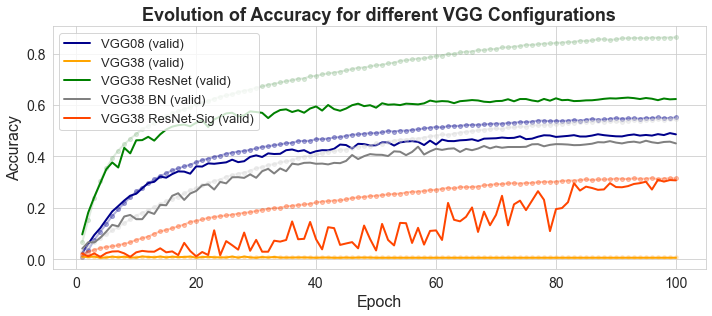

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


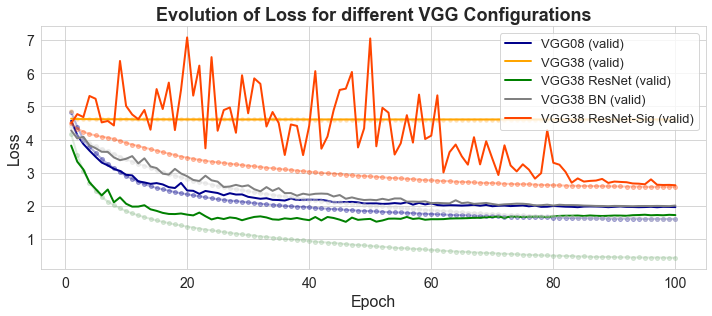

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


In [110]:
plot_acc_error_evolution(df_result_dict, 'exp_set_1')

## Experiment Set 1.a -  Testing if solution is consisten for multiple seeds

In [8]:
# Collect Results DataFrames
experiment_dir = '../Remote_Experiments/Seed_Experiments/'
df_result_dict = size_fixer(collect_experiment_dicts(target_dir=experiment_dir), 100)
df_result_dict['VGG_38_ResNet_experiment_seed_0'] = baseline_ResNet 

# Show last results
for experiment in df_result_dict.keys():
    print("\nExperiment:", experiment)
    print(df_result_dict[experiment].tail(1))

Data files: ['VGG_38_ResNet_wd_1e_3_s10', 'VGG_38_ResNet_wd_1e_3_s30']

Experiment: VGG_38_ResNet_wd_1e_3_s10
    train_acc  train_loss  val_acc  val_loss
99   0.856989    0.461924   0.6176  1.704668

Experiment: VGG_38_ResNet_wd_1e_3_s30
    train_acc  train_loss  val_acc  val_loss
99   0.848947    0.484249   0.6136  1.731053

Experiment: VGG_38_ResNet_experiment_seed_0
    train_acc  train_loss  val_acc  val_loss
99   0.862611    0.437051   0.6232  1.724516


## Plotter

In [9]:
def plot_acc_error_evolution(dataset_dict):
    
    # Dataset list
    ds_list = list(dataset_dict.values())
    
    # Get epoch number for x axis
    epoch_n = range(1, len(ds_list[0])+1)

    titles = ['Evolution of Accuracy for different VGG Configurations', 'Evolution of Loss for different VGG Configurations']
    acc_loss = ['acc', 'loss']
    ylabels = ['ACcuracy', 'Loss']
    
    for i in range(len(titles)):
        fig, axes = plt.subplots(figsize = (10,5))

        # Plot lines
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[0], marker='.', markerfacecolor='lightblue', markersize=8, color='skyblue', linewidth=3, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[0], marker='', color='dodgerblue', linewidth=3, label = 'VGG ResNet 38 Layers Seed 10 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[1], marker='.', markerfacecolor='orange', markersize=8, color='peachpuff', linewidth=3, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, "val_"+acc_loss[i], data=ds_list[1], marker='', color='orange', linewidth=3, label = 'VGG ResNet 38 Layers Seed 30 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[2], marker='.', markerfacecolor='darkseagreen', markersize=8, color='darkseagreen', linewidth=3,alpha=0.3,  label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[2], marker='', color='green', linewidth=3, label = 'VGG ResNet 38 Layers Seed 0 (valid)')
        axes.legend(loc='best', prop={'size': 13})
        axes.tick_params(axis='both', which='major', labelsize=12)
        axes.set_ylabel(ylabels[i], fontsize=15)
        axes.set_xlabel('Epoch', fontsize=15)
        axes.set_title(titles[i], fontweight="bold", fontsize=15)
    
        plt.tight_layout()
        plt.show()
        plot_name='exp_set_2'
        fig.savefig('plots/{}_{}_performance.pdf'.format(plot_name, acc_loss[i]), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

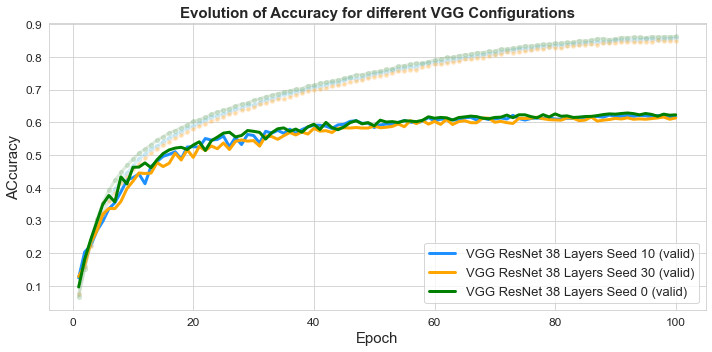

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


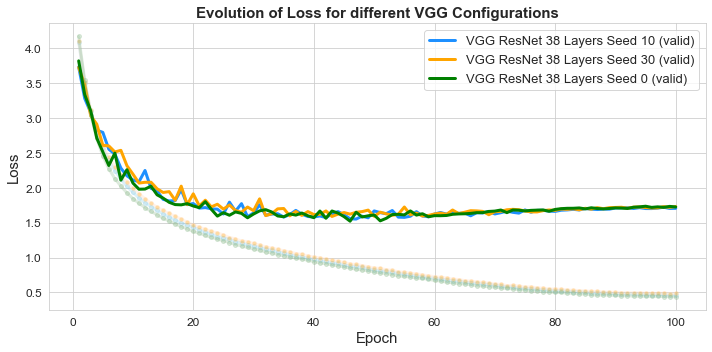

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


In [10]:
plot_acc_error_evolution(df_result_dict)

## Experiment Set 2 -  Testing weight decay coefficients

In [105]:
# Collect Results DataFrames
experiment_dir = '../Remote_Experiments/Experiment_Set_2/'
df_result_dict = size_fixer(collect_experiment_dicts(target_dir=experiment_dir), 100)
df_result_dict['VGG 38 ResNet'] = baseline_ResNet
best_ResNet = df_result_dict['VGG_38_ResNet_wd_1e_3']
# Show last results
for experiment in df_result_dict.keys():
    print("\nExperiment:", experiment)
    print(df_result_dict[experiment].tail(1))

Data files: ['VGG_38_ResNet_wd_1e_4', 'VGG_38_ResNet_wd_1e_3', 'VGG_38_ResNet_wd_1e_2']

Experiment: VGG_38_ResNet_wd_1e_4
    train_acc  train_loss  val_acc  val_loss
99   0.882316    0.375875   0.6264  1.697324

Experiment: VGG_38_ResNet_wd_1e_3
    train_acc  train_loss  val_acc  val_loss
99   0.878337    0.419799   0.6532  1.353324

Experiment: VGG_38_ResNet_wd_1e_2
    train_acc  train_loss  val_acc  val_loss
99   0.580884    1.533413   0.5352  1.688711

Experiment: VGG 38 ResNet
    train_acc  train_loss  val_acc  val_loss
99   0.862611    0.437051   0.6232  1.724516


## Plotter

In [106]:
def plot_acc_error_evolution(dataset_dict):
    
    # Dataset list
    ds_list = list(dataset_dict.values())
    
    # Get epoch number for x axis
    epoch_n = range(1, len(ds_list[0])+1)

    titles = ['Evolution of Accuracy for VGG38 ResNet with weight decay', 'Evolution of Loss for VGG38 ResNet with weight decay']
    acc_loss = ['acc', 'loss']
    ylabels = ['Accuracy', 'Loss']
    
    for i in range(len(titles)):
        fig, axes = plt.subplots(figsize = (10,4.5))

        # Plot lines
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[0], marker='.', markerfacecolor='lightblue', markersize=8, color='skyblue', linewidth=2, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[0], marker='', color='dodgerblue', linewidth=2, label = '$\lambda = $ 1e-4 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[1], marker='.', markerfacecolor='orange', markersize=8, color='peachpuff', linewidth=2, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, "val_"+acc_loss[i], data=ds_list[1], marker='', color='orange', linewidth=2, label = '$\lambda = $ 1e-3 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[2], marker='.', markerfacecolor='darkseagreen', markersize=8, color='darkseagreen', linewidth=2,alpha=0.3,  label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[2], marker='', color='green', linewidth=2, label = '$\lambda = $ 1e-2 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[3], marker='.', markerfacecolor='grey', markersize=8, color='grey', linewidth=2,alpha=0.3,  label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[3], marker='', color='grey', linewidth=2, label = 'VGG 38 ResNet (valid)')

        axes.set_ylabel(ylabels[i], fontsize=16)
        if i == 0:
            axes.set_title('Evolution of Accuracy and Loss for VGG38 ResNet with weight decay', fontweight="bold", fontsize=18)
            axes.tick_params(axis='both', which='major', bottom=False, top=False, labelbottom=False, labelsize=12)
            axes.legend(loc='best', prop={'size': 17})

        if i == 1:
            axes.set_xlabel('Epoch', fontsize=16)
            axes.tick_params(axis='both', which='major',labelsize=14)
        plt.tight_layout()
        plt.show()
        plot_name='exp_set_3'
        fig.savefig('plots/{}_{}_performance.pdf'.format(plot_name, acc_loss[i]), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

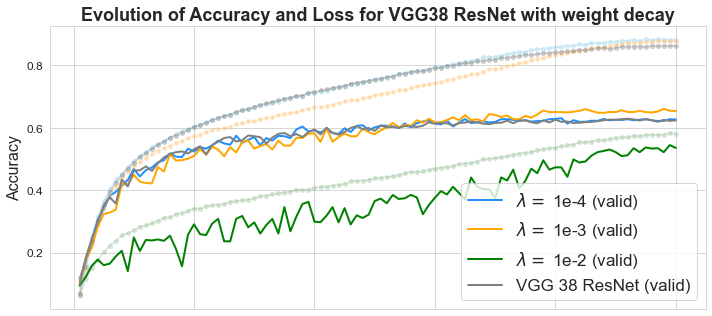

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


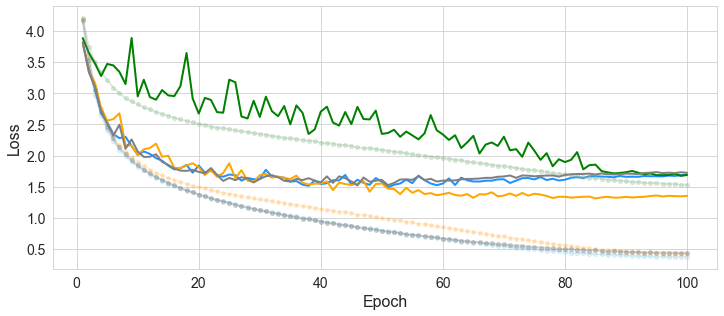

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


In [107]:
plot_acc_error_evolution(df_result_dict)

## Experiment Set 3 -  Testing Learning Rate variations

In [101]:
# Collect Results DataFrames
experiment_dir = '../Remote_Experiments/Experiment_Set_3/'
df_result_dict = size_fixer(collect_experiment_dicts(target_dir=experiment_dir), 100)
df_result_dict['VGG 38 ResNet'] = baseline_ResNet
df_result_dict['Bacth 256'] = batch_result_dict['VGG_38_ResNet_bs_256']
df_result_dict['Batch 512'] = batch_result_dict['VGG_38_ResNet_bs_512']
df_result_dict['WP 1e-3'] = best_ResNet

# Show last results
for experiment in df_result_dict.keys():
    print("\nExperiment:", experiment)
    print(df_result_dict[experiment].tail(1))

Data files: ['VGG_38_ResNet_LR_5', 'VGG_38_ResNet_LR_30', 'VGG_38_ResNet_LR_100']

Experiment: VGG_38_ResNet_LR_5
    train_acc  train_loss  val_acc  val_loss
99   0.600105    1.406288   0.5464  1.634162

Experiment: VGG_38_ResNet_LR_30
    train_acc  train_loss  val_acc  val_loss
99   0.216358    3.158098   0.2108  3.171369

Experiment: VGG_38_ResNet_LR_100
    train_acc  train_loss  val_acc  val_loss
99   0.157621    3.512043   0.1572    3.4995

Experiment: VGG 38 ResNet
    train_acc  train_loss  val_acc  val_loss
99   0.862611    0.437051   0.6232  1.724516

Experiment: Bacth 256
    train_acc  train_loss  val_acc  val_loss
99   0.889784    0.390893  0.61714  1.510164

Experiment: Batch 512
    train_acc  train_loss   val_acc  val_loss
99   0.862885    0.483501  0.600145  1.555187

Experiment: WP 1e-3
    train_acc  train_loss  val_acc  val_loss
99   0.878337    0.419799   0.6532  1.353324


## Plotter

In [102]:
def plot_acc_error_evolution(dataset_dict):
    
    # Dataset list
    ds_list = list(dataset_dict.values())
    
    # Get epoch number for x axis
    epoch_n = range(1, len(ds_list[0])+1)

    titles = ['Evolution of Accuracy for VGG38 RN+WP for different Learning Rates', 'Evolution of Loss for VGG38 RN+WP for different Learning Rates']
    acc_loss = ['acc', 'loss']
    ylabels = ['Accuracy', 'Loss']
    
    for i in range(len(titles)):
        fig, axes = plt.subplots(figsize = (10,5))

        # Plot lines
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[0], marker='.', markerfacecolor='lightblue', markersize=8, color='skyblue', linewidth=2, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[0], marker='', color='dodgerblue', linewidth=2, label = 'LR x5 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[1], marker='.', markerfacecolor='orange', markersize=8, color='peachpuff', linewidth=2, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, "val_"+acc_loss[i], data=ds_list[1], marker='', color='orange', linewidth=2, label = 'LR x30 (valid)')
        
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[3], marker='.', markerfacecolor='orangered', markersize=8, color='orangered', linewidth=2,alpha=0.3,  label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[3], marker='', color='orangered', linewidth=2, label = 'mini-batch size 256 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[4], marker='.', markerfacecolor='salmon', markersize=8, color='salmon', linewidth=2,alpha=0.3,  label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[4], marker='', color='salmon', linewidth=2, label = 'mini-batch size 512 (valid)')
        
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[5], marker='.', markerfacecolor='darkseagreen', markersize=8, color='darkseagreen', linewidth=2,alpha=0.3,  label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[5], marker='', color='green', linewidth=2, label = 'VGG38 RN+WP (valid)')
        #axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[3], marker='.', markerfacecolor='grey', markersize=8, color='grey', linewidth=2,alpha=0.3,  label = '_nolegend_')
        #axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[3], marker='', color='grey', linewidth=2, label = 'VGG 38 ResNet (valid)')

        axes.legend(loc='best', prop={'size': 16})
        axes.tick_params(axis='both', which='major', labelsize=14)
        axes.set_ylabel(ylabels[i], fontsize=16)
        axes.set_xlabel('Epoch', fontsize=16)
        axes.set_title(titles[i], fontweight="bold", fontsize=18)
    
        plt.tight_layout()
        plt.show()
        plot_name='exp_set_4'
        fig.savefig('plots/{}_{}_performance.pdf'.format(plot_name, acc_loss[i]), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

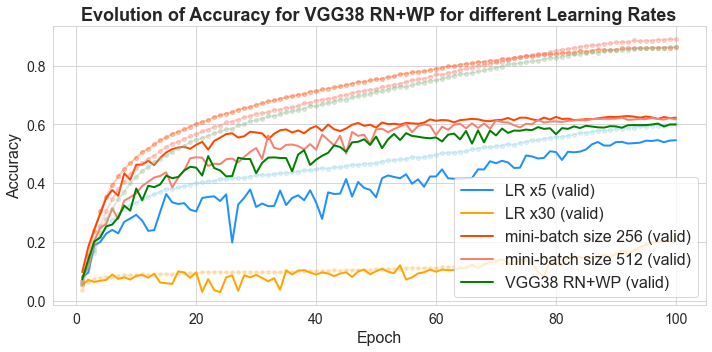

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


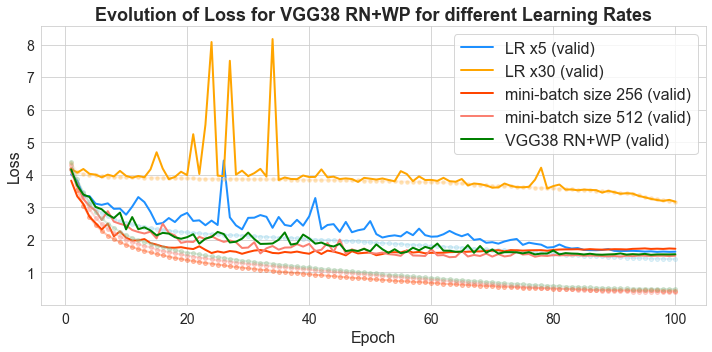

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


In [103]:
plot_acc_error_evolution(df_result_dict)

## Experiment Set 4 -  Testing Batch size variations

In [85]:
# Collect Results DataFrames
experiment_dir = '../Remote_Experiments/Experiment_Set_4/'
batch_result_dict = size_fixer(collect_experiment_dicts(target_dir=experiment_dir), 100)
batch_result_dict['VGG 38 ResNet'] = baseline_ResNet
batch_result_dict['WP 1e-3'] = best_ResNet

# Show last results
for experiment in batch_result_dict.keys():
    print("\nExperiment:", experiment)
    print(batch_result_dict[experiment].tail(1))

Data files: ['VGG_38_ResNet_bs_64', 'VGG_38_ResNet_bs_256', 'VGG_38_ResNet_bs_512']

Experiment: VGG_38_ResNet_bs_64
    train_acc  train_loss   val_acc  val_loss
99   0.833803    0.564995  0.650781  1.286109

Experiment: VGG_38_ResNet_bs_256
    train_acc  train_loss  val_acc  val_loss
99   0.889784    0.390893  0.61714  1.510164

Experiment: VGG_38_ResNet_bs_512
    train_acc  train_loss   val_acc  val_loss
99   0.862885    0.483501  0.600145  1.555187

Experiment: VGG 38 ResNet
    train_acc  train_loss  val_acc  val_loss
99   0.862611    0.437051   0.6232  1.724516

Experiment: WP 1e-3
    train_acc  train_loss  val_acc  val_loss
99   0.878337    0.419799   0.6532  1.353324


## Plotter

In [20]:
def plot_acc_error_evolution(dataset_dict):
    
    # Dataset list
    ds_list = list(dataset_dict.values())
    
    # Get epoch number for x axis
    epoch_n = range(1, len(ds_list[0])+1)

    titles = ['Evolution of Accuracy for VGG38 ResNet with different min-batch sizes', 'Evolution of Loss for VGG38 ResNet with different min-batch sizes']
    acc_loss = ['acc', 'loss']
    ylabels = ['Accuracy', 'LOss']
    
    for i in range(len(titles)):
        fig, axes = plt.subplots(figsize = (10,5))

        # Plot lines
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[0], marker='.', markerfacecolor='lightblue', markersize=8, color='skyblue', linewidth=2, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[0], marker='', color='dodgerblue', linewidth=2, label = 'Batch Size 64 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[1], marker='.', markerfacecolor='orange', markersize=8, color='peachpuff', linewidth=2, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, "val_"+acc_loss[i], data=ds_list[1], marker='', color='orange', linewidth=2, label = 'Batch Size 256 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[2], marker='.', markerfacecolor='darkseagreen', markersize=8, color='darkseagreen', linewidth=2,alpha=0.3,  label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[2], marker='', color='green', linewidth=2, label = 'Batch Size 512 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[4], marker='.', markerfacecolor='grey', markersize=8, color='grey', linewidth=2,alpha=0.3,  label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[4], marker='', color='grey', linewidth=2, label = 'WP 1e-3 (valid)')

        axes.legend(loc='best', prop={'size': 15})
        axes.tick_params(axis='both', which='major', labelsize=12)
        axes.set_ylabel(ylabels[i], fontsize=15)
        axes.set_xlabel('Epoch', fontsize=15)
        axes.set_title(titles[i], fontweight="bold", fontsize=16)
    
        plt.tight_layout()
        plt.show()
        plot_name='exp_set_6'
        fig.savefig('plots/{}_{}_performance.pdf'.format(plot_name, acc_loss[i]), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

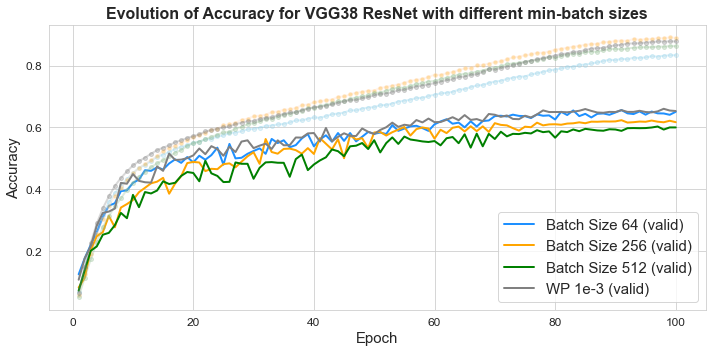

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


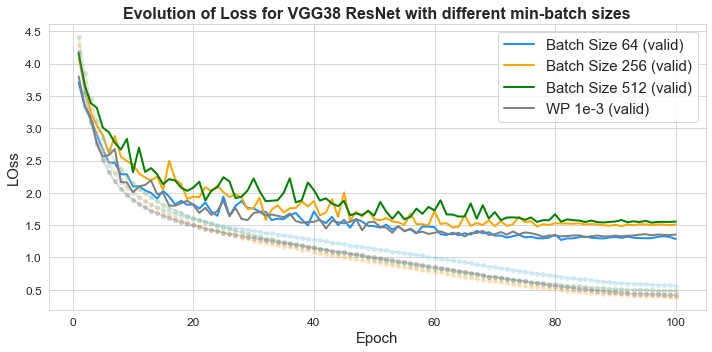

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


In [21]:
plot_acc_error_evolution(batch_result_dict)

## Experiment Set 5 -  Testing Deeper Models

In [90]:
# Collect Results DataFrames
experiment_dir = '../Remote_Experiments/Experiment_Set_5/'
df_result_dict = size_fixer(collect_experiment_dicts(target_dir=experiment_dir), 100)
df_result_dict['VGG 38 ResNet'] = baseline_ResNet
df_result_dict['WP 1e-3'] = best_ResNet

# Show last results
for experiment in df_result_dict.keys():
    print("\nExperiment:", experiment)
    print(df_result_dict[experiment].tail(1))

Data files: ['VGG_68_ResNet', 'VGG_72_ResNet', 'VGG_106_ResNet']

Experiment: VGG_68_ResNet
    train_acc  train_loss  val_acc  val_loss
99   0.868589      0.4454   0.6676  1.298147

Experiment: VGG_72_ResNet
    train_acc  train_loss  val_acc  val_loss
99   0.900211     0.33167   0.6708  1.323875

Experiment: VGG_106_ResNet
    train_acc  train_loss  val_acc  val_loss
99   0.903474    0.322559   0.6656  1.341619

Experiment: VGG 38 ResNet
    train_acc  train_loss  val_acc  val_loss
99   0.862611    0.437051   0.6232  1.724516

Experiment: WP 1e-3
    train_acc  train_loss  val_acc  val_loss
99   0.878337    0.419799   0.6532  1.353324


## Plotter

In [99]:
def plot_acc_error_evolution(dataset_dict):
    
    # Dataset list
    ds_list = list(dataset_dict.values())
    
    # Get epoch number for x axis
    epoch_n = range(1, len(ds_list[0])+1)

    titles = ['Evolution of Accuracy and Loss for VGG38 ResNet for different depths', 'Evolution of Loss for VGG38 ResNet for different depths']
    acc_loss = ['acc', 'loss']
    ylabels = ['Accuracy', 'Error']
    
    for i in range(len(titles)):
        fig, axes = plt.subplots(figsize = (10,5))

        # Plot lines
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[0], marker='.', markerfacecolor='lightblue', markersize=8, color='skyblue', linewidth=2, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[0], marker='', color='dodgerblue', linewidth=2, label = 'VGG68 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[1], marker='.', markerfacecolor='orange', markersize=8, color='peachpuff', linewidth=2, alpha=0.3, label = '_nolegend_')
        axes.plot( epoch_n, "val_"+acc_loss[i], data=ds_list[1], marker='', color='orange', linewidth=2, label = 'VGG72 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[2], marker='.', markerfacecolor='darkseagreen', markersize=8, color='darkseagreen', linewidth=2,alpha=0.3,  label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[2], marker='', color='green', linewidth=2, label = 'VGG106 (valid)')
        axes.plot( epoch_n, 'train_'+acc_loss[i], data=ds_list[4], marker='.', markerfacecolor='grey', markersize=8, color='grey', linewidth=2,alpha=0.3,  label = '_nolegend_')
        axes.plot( epoch_n, 'val_'+acc_loss[i], data=ds_list[4], marker='', color='grey', linewidth=2, label = 'VGG38 RN+WP(valid)')

        axes.set_ylabel(ylabels[i], fontsize=16)
        if i == 0:
            axes.set_title('Evolution of Accuracy and Loss for VGG with multiple depths', fontweight="bold", fontsize=18)
            axes.tick_params(axis='both', which='major', bottom=False, top=False, labelbottom=False, labelsize=12)
            axes.legend(loc='best', prop={'size': 18})

        if i == 1:
            axes.set_xlabel('Epoch', fontsize=16)
            axes.tick_params(axis='both', which='major',labelsize=14)
        plt.tight_layout()
        plt.show()
        plot_name='exp_set_7'
        fig.savefig('plots/{}_{}_performance.pdf'.format(plot_name, acc_loss[i]), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

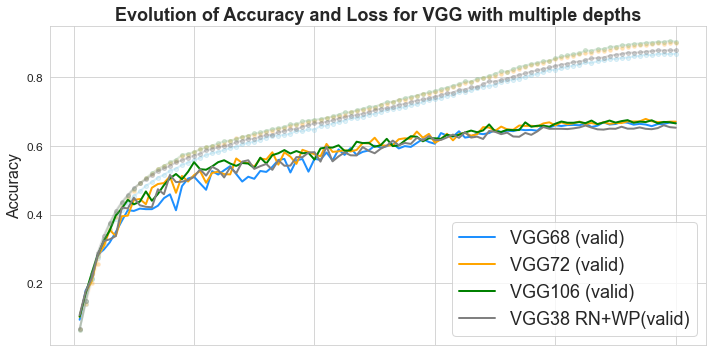

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


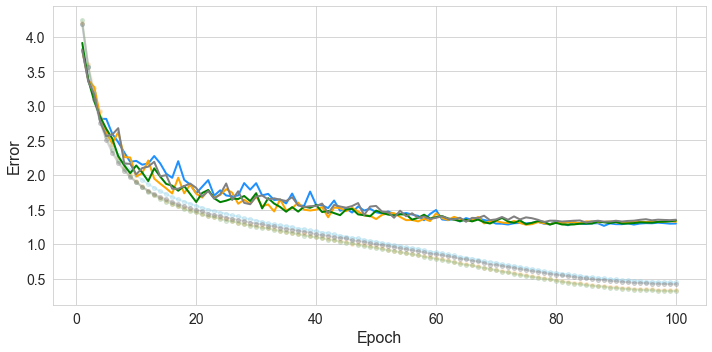

/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/afs/inf.ed.ac.uk/user/s21/s2118610/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


In [100]:
plot_acc_error_evolution(df_result_dict)